## SKYFAST: Tutorial
##### This tutorial shows how to use SKYFAST, a Python code based on FIGARO (Rinaldi&Del Pozzo, 2022) for the rapid localization of gravitational wave hosts



### Installation

Create a conda environment:

`conda create --name skyfast_env python==3.9`.

Then activate it:
`conda activate skyfast_env`

Then download the package from git:

`git clone https://github.com/gabrieledemasi/skyfast.git`


Move in the downloaded directory and install the package:

` python setup.py install`




load the Glade galaxy catalog
* Download the 6Gb file from http://glade.elte.hu/;
* 
* Preprocess it running `make_glade -i "/path_to_the_file"`: this create, in the same folder, a lighter hdf5 file, that can be passed to skyfast




In [ ]:
glade_file = 'data/glade+.hdf5'

In [1]:
#import figaro
import numpy as np
from tqdm import tqdm
from skyfast.skyfast import skyfast
from skyfast.coordinates import celestial_to_cartesian



Now we load the parameter estimation samples of our preferred event: that is of course GW150914

In [2]:
from figaro.load import load_single_event
samples, name = load_single_event('data/GW150914_volume.txt') 

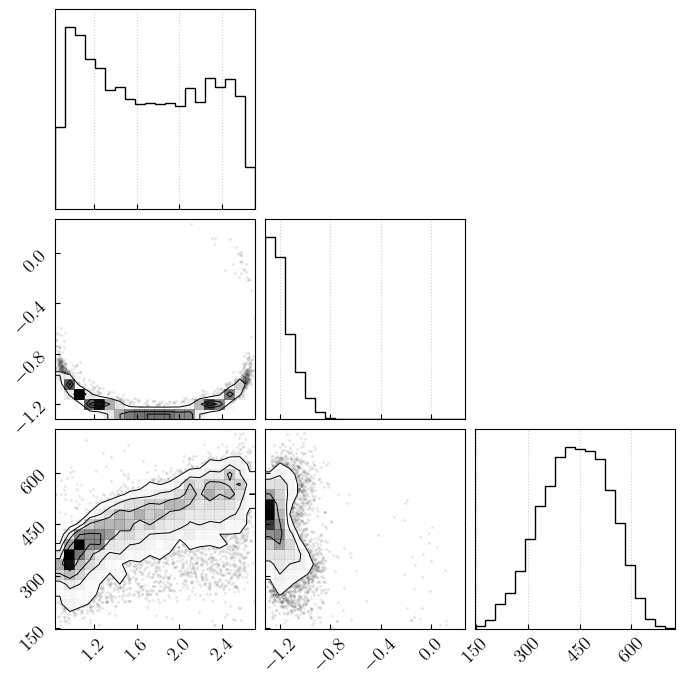

In [3]:
from corner import corner 
c = corner(samples)

In [10]:
from figaro.utils import get_priors
eps = 0.1
bounds = np.array([[0.-eps, 2*np.pi+eps], [-np.pi/2 -eps, np.pi/2+eps], [0.-eps, 1000+eps]])
a = get_priors(bounds = bounds,std = 0.01, probit = True)
print(a)


(0.2, array([[0.0001, 0.    , 0.    ],
       [0.    , 0.0001, 0.    ],
       [0.    , 0.    , 0.0001]]), 5, array([0., 0., 0.]))


And finally we initialize a skyfast class:

In [4]:


dens = skyfast(1000, #maximum distance at which we expect to have a distance sample
                std = 0.01, 
                n_gridpoints = [100, 100, 50],
                #entropy = True,  #If True, an intermediate skymap is created when the convergence is reached
                n_entropy_MC_draws=1e3)




To reconstruct the 3D probability volume, we use the `intermediate_skymap` method, which takes the MCMC samples one by one. The sample returned by a MCMC are in general in celestial coordinate, but at the moment skyfast accept only cartesian coordinates, so we must convert the samples before using:

Since the samples that we use are likelihood_ordered, we shuffle them:

Now we are read to pass the samples to skyfast: remind that the must passed one by one!

As the samples are passed to intermediate_skymap, they are added to the DPGMM mixture.

If `entropy=True` then the information entropy is computed, and if the convergence is reached then an intermediate skymap is released.



In [5]:
for i in tqdm(range(len(samples))):
        dens.intermediate_skymap(samples[i])
        

100%|██████████| 8350/8350 [00:51<00:00, 162.61it/s]


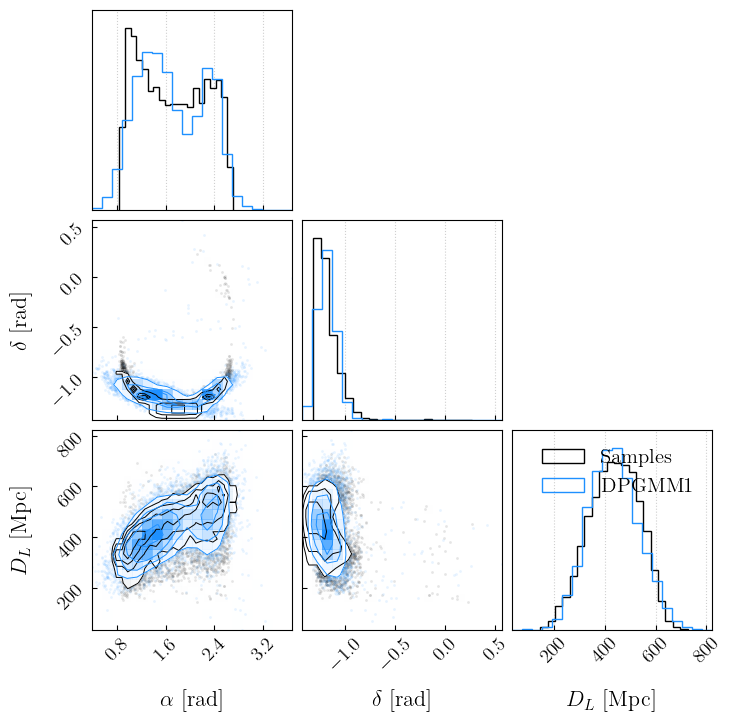

In [6]:
dens.plot_samples(samples)
#dens.make_entropy_plot()

dens.make_skymap(final_map = True)
#dens.make_volume_map(final_map = True)